In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/data (1).csv')

In [42]:
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

In [44]:
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.80) + 1

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svc_original = SVC()
svc_original.fit(X_train_scaled, y_train)
y_pred_original = svc_original.predict(X_test_scaled)

svc_pca = SVC()
svc_pca.fit(X_train_pca, y_train)
y_pred_pca = svc_pca.predict(X_test_pca)
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

cm_original = confusion_matrix(y_test, y_pred_original)
cm_pca = confusion_matrix(y_test, y_pred_pca)

Accuracy (Original): 0.9824561403508771
Accuracy (PCA): 0.9649122807017544
Confusion Matrix (Original):
[[71  0]
 [ 2 41]]
Confusion Matrix (PCA):
[[69  2]
 [ 2 41]]


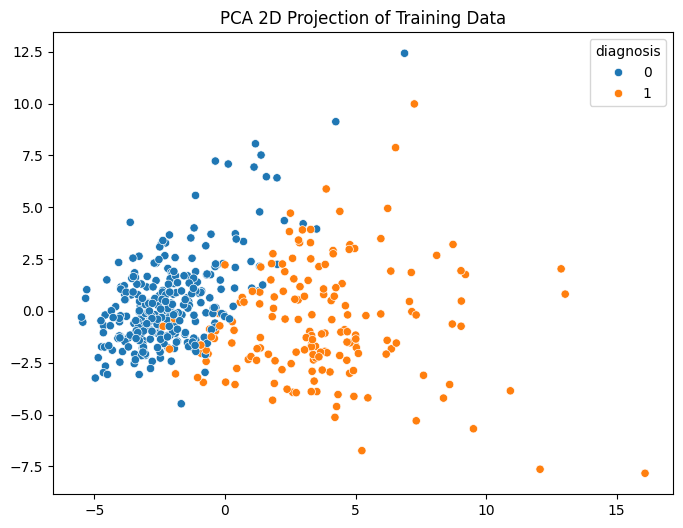

In [43]:
print(f"Accuracy (Original): {accuracy_original}")
print(f"Accuracy (PCA): {accuracy_pca}")
print(f"Confusion Matrix (Original):\n{cm_original}")
print(f"Confusion Matrix (PCA):\n{cm_pca}")

if n_components >= 2:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train)
  plt.title('PCA 2D Projection of Training Data')
  plt.show()
